<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import matplotlib
#matplotlib.use("Agg") # use in case of CL python run
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers 
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import os

In [ ]:
# argument parser for CL usage
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,help="full path to location of classes subfolders")
ap.add_argument("-m", "--model", required=True,help="full path to output model")
ap.add_argument("-l", "--label-bin", required=True,help="full path to output label binarizer")
ap.add_argument("-e", "--epochs", type=int, default=25,help="# of epochs to train  network for")
ap.add_argument("-p", "--plot", type=str, default="plot.png",help="path to output loss/accuracy plot")
args = vars(ap.parse_args())

In [2]:
dataset='/home/emmanouela/Documents/mosAIc.gr/2DCNN/original_models/data'

In [3]:
#imagePaths = list(paths.list_images(args["dataset"])) # use instead in case of CL call to .py version 
imagePaths = list(paths.list_images(dataset))

data = []
labels = []
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(label)

In [4]:
data = np.array(data)
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

(trainX, validX, trainY, validY) = train_test_split(data, labels,test_size=0.25, stratify=labels, random_state=42)

[0 0 1]


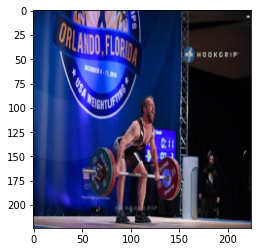

In [5]:
rand=1952
image=data[rand,:,:,:]
plt.imshow(image)
print(labels[rand])

In [6]:
# add potential augmentation
train_datagen = ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True,rotation_range=30,
                zoom_range=0.15,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.15,
                horizontal_flip=True,
                fill_mode="nearest")

valid_datagen = ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True)

In [7]:
PARAMS = {'lr': 1e-4,
          'dropout': 0.5,
          'batch_size': 32,
          'n_epochs': 50,
          'optimizer': 'RMSprop',
          'loss': 'categorical_crossentropy',
          'metrics': 'acc',
          'activations': 'relu, softmax',
          'image_input_shape' : (224,224,3)
          }

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(PARAMS['dropout']))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [9]:
model.compile(loss=PARAMS['loss'],
              optimizer=optimizers.RMSprop(lr=PARAMS['lr']),
              metrics=[PARAMS['metrics']])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [11]:

spe=len(trainX) // PARAMS['batch_size']
val_spe=len(validY) // PARAMS['batch_size']

history = model.fit(x=train_datagen.flow(trainX, trainY, batch_size=PARAMS['batch_size']),
steps_per_epoch=spe,
validation_data=valid_datagen.flow(validX, validY),
validation_steps=val_spe,
epochs=PARAMS['n_epochs'])

Epoch 1/50
48/48 [==============================] - 8s 166ms/step - loss: 14.5692 - acc: 0.4342 - val_loss: 0.8931 - val_acc: 0.6289
Epoch 2/50
48/48 [==============================] - 8s 166ms/step - loss: 1.0906 - acc: 0.5487 - val_loss: 0.7011 - val_acc: 0.7031
Epoch 3/50
48/48 [==============================] - 8s 167ms/step - loss: 0.8771 - acc: 0.6355 - val_loss: 0.7048 - val_acc: 0.6777
Epoch 4/50
48/48 [==============================] - 8s 168ms/step - loss: 0.8049 - acc: 0.6770 - val_loss: 0.6629 - val_acc: 0.6953
Epoch 5/50
48/48 [==============================] - 8s 169ms/step - loss: 0.7387 - acc: 0.7112 - val_loss: 0.7084 - val_acc: 0.6758
Epoch 6/50
48/48 [==============================] - 8s 170ms/step - loss: 0.6957 - acc: 0.7237 - val_loss: 0.5895 - val_acc: 0.7832
Epoch 7/50
48/48 [==============================] - 8s 169ms/step - loss: 0.6895 - acc: 0.7401 - val_loss: 0.5606 - val_acc: 0.7715
Epoch 8/50
48/48 [==============================] - 8s 168ms/step - loss: 0

                precision    recall  f1-score   support

      football       0.91      0.88      0.90       196
        tennis       0.84      0.72      0.77       179
weight_lifting       0.73      0.90      0.80       143

      accuracy                           0.83       518
     macro avg       0.83      0.83      0.82       518
  weighted avg       0.84      0.83      0.83       518



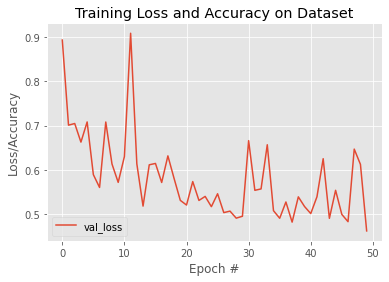

In [16]:
# perform predictions on validation set

predictions = model.predict(x=validX.astype("float32"), batch_size=PARAMS['batch_size'])
print(classification_report(validY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

# plot the training loss and accuracy
#N = args["epochs"]
N=50
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
#plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])


In [17]:
#model.save(args["model"], save_format="h5")
model.save('results/sports.h5', save_format="h5")

#f = open(args["label_bin"], "wb")
f = open('results/lb.pickle', "wb")

f.write(pickle.dumps(lb))
f.close()